In [4]:
import scipy.io as sio
import scipy.signal as signal
from matplotlib import image
import numpy as np
import matplotlib.pyplot as plt
from math import inf

%matplotlib inline

A grayscale digital image is a two-variable function f(m,n) defined on a discrete two-dimensional area domain m, n

mat file contains original image and noisy image.

noisy image is `images/testimage.mat`

In [5]:
mat = sio.loadmat('images/testimage.mat')

print(mat['noisy'].shape, mat['original'].shape, mat['info'])

(240, 320) (240, 320) ['This is a picture of Olympus Mons on Mars']


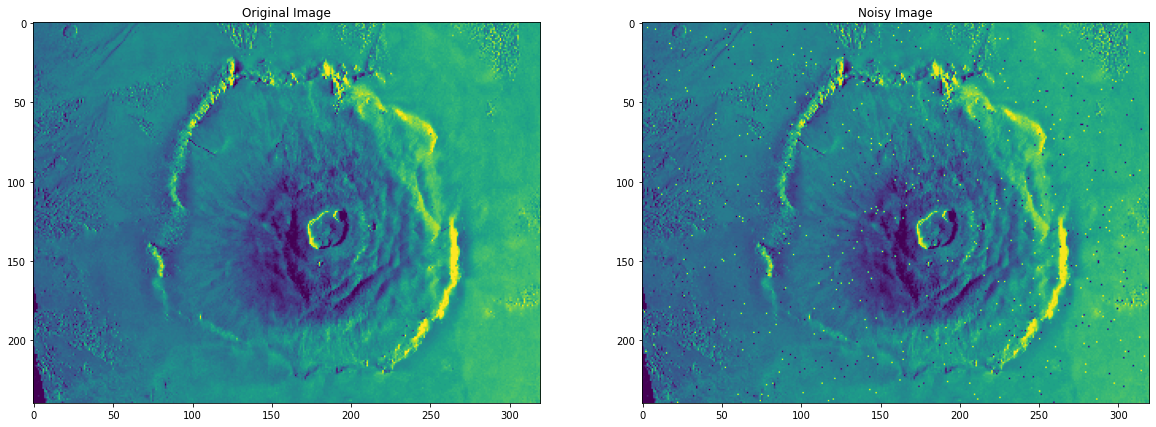

In [6]:
noisy_image = mat["noisy"]

# figsize() function to adjust the size
plt.subplots(figsize=(20, 8))

# using subplot function and creating plot one
plt.subplot(1, 2, 1)
plt.imshow(mat['original'])
plt.title('Original Image')

# using subplot function and creating plot two
plt.subplot(1, 2, 2)
plt.imshow(noisy_image)
plt.title('Noisy Image')

plt.savefig('filtered-images/noisy-original.jpg')

# show plot
plt.show()

### median filter
$$
y_{1}(n) = median\{ x(n-k) \}, k \in Z, \vert k \vert \leq 1
$$

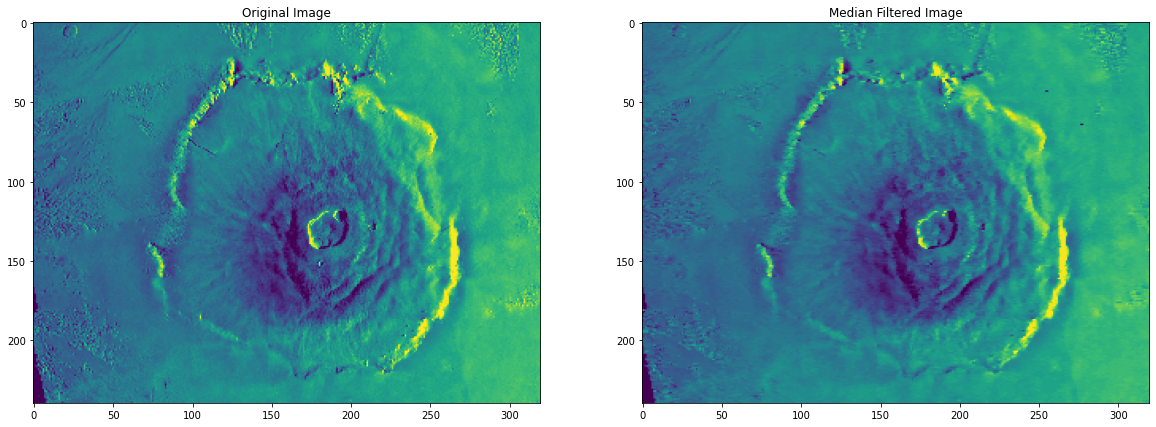

In [190]:
def median_filter(noisy_image, mat_file=None, data = False):

    filtered_image = np.ndarray.copy(noisy_image)
    for row in range(noisy_image.shape[0]):
        for column in range(1, noisy_image.shape[1] - 1):
            list = [noisy_image[row][column-k] for k in (-1, 0, 1)]
            filtered_image[row][column] = np.median(list)

    if mat_file:
        new_mat = dict.copy(mat_file)
        new_mat["original"] = filtered_image
        sio.savemat("filtered-mat/median.mat", new_mat)

    #image.imsave( "filtered-images/median.jpg", filtered_image)
    
    if data:
        return filtered_image

    # figsize() function to adjust the size
    plt.subplots(figsize=(20, 8))

    # using subplot function and creating plot one
    plt.subplot(1, 2, 1)
    plt.imshow(mat['original'])
    plt.title('Original Image')

    # using subplot function and creating plot two
    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image)
    plt.title('Median Filtered Image')

    plt.savefig( "filtered-images/median.jpg")
    # show plot
    plt.show()
    
    
    
median_filter(noisy_image, mat_file = mat)


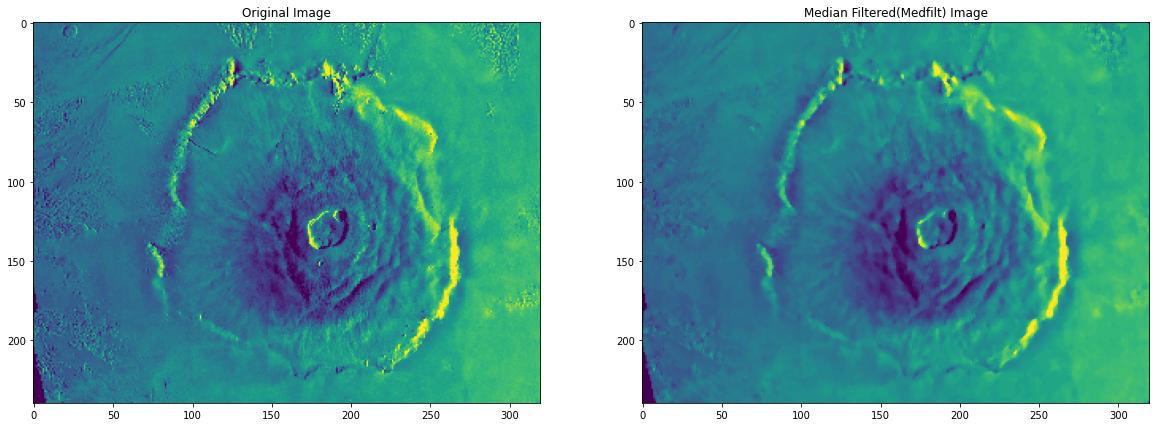

In [194]:
def median_filter_scipy(noisy_image, mat_file=None, data = False):
    filtered_image = signal.medfilt(noisy_image, 3)
    if mat_file:
        new_mat = dict.copy(mat_file)
        new_mat["original"] = filtered_image
        sio.savemat("filtered-mat/median_scipy.mat", new_mat)

    #image.imsave("filtered-images/median_scipy.jpg", filtered_image)
    
    if data:
        return filtered_image

    # figsize() function to adjust the size
    plt.subplots(figsize=(20, 8))

    # using subplot function and creating plot one
    plt.subplot(1, 2, 1)
    plt.imshow(mat['original'])
    plt.title('Original Image')

    # using subplot function and creating plot two
    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image)
    plt.title('Median Filtered(Medfilt) Image')

    plt.savefig("filtered-images/median_scipy.jpg")
    # show plot
    plt.show()
    
    
    
median_filter_scipy(noisy_image, mat_file= mat)


### mean filter
 
\begin{equation}
  y_{2}(n) = \frac{1}{M_1 + M_2 + 1} \sum_{k=-M_1}^{M_2} x(n-k) \\
\end{equation}

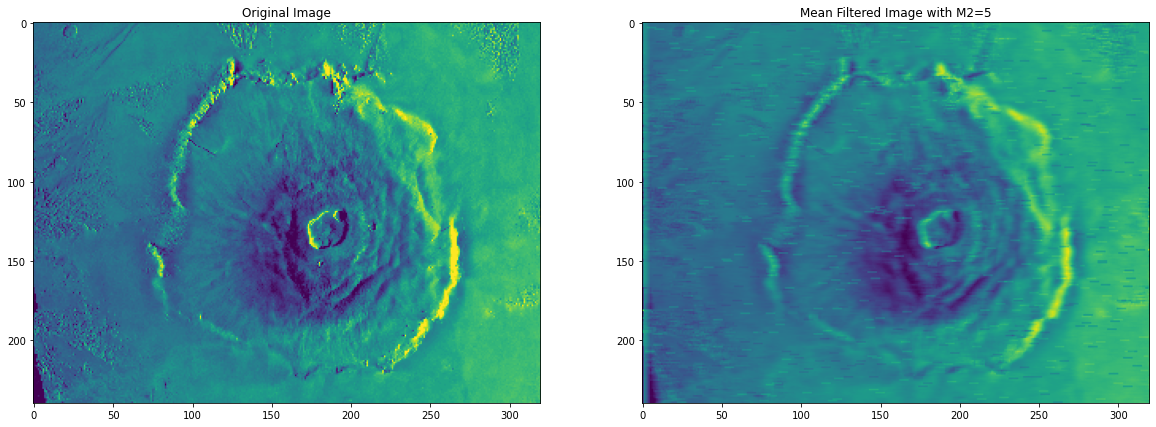

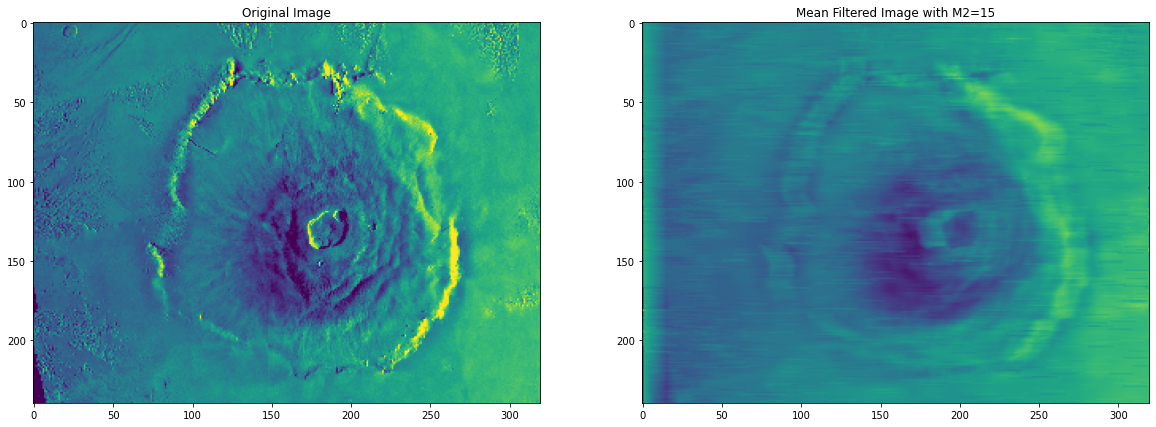

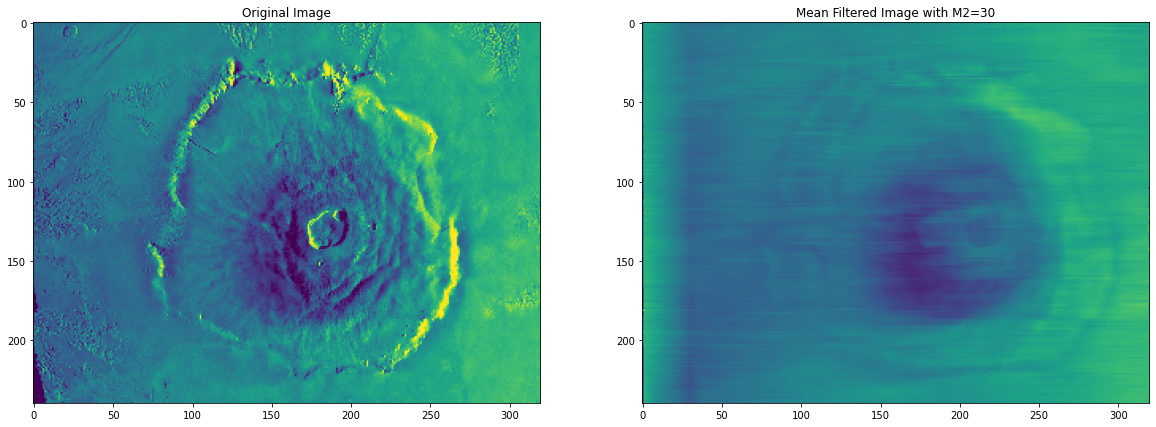

In [192]:
def mean_filter(noisy_image, M2, mat_file=None, M1=0, data=False):
    filtered_image = np.ndarray.copy(noisy_image)
    for row in range(noisy_image.shape[0]):
        for column in range(1, noisy_image.shape[1]-1):
            filter_sum = 0
            for k in range(-M1, M2+1):
                filter_sum += noisy_image[row][column-k]

            filtered_image[row][column] = (filter_sum) / (M1 + M2 + 1)
    if mat_file:
        new_mat = dict.copy(mat_file)
        new_mat["original"] = filtered_image
        sio.savemat(f"filtered-mat/mean_M2={M2}.mat", new_mat)

    #image.imsave(f"filtered-images/mean_M2={M2}.jpg", filtered_image)
    
    if data:
        return filtered_image
    
    # figsize() function to adjust the size
    plt.subplots(figsize=(20, 8))

    # using subplot function and creating plot one
    plt.subplot(1, 2, 1)
    plt.imshow(mat['original'])
    plt.title('Original Image')

    # using subplot function and creating plot two
    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image)
    plt.title(f'Mean Filtered Image with M2={M2}')

    plt.savefig(f"filtered-images/mean_M2={M2}.jpg")
    # show plot
    plt.show()
    
    
M2 = [5, 15, 30]

for i in M2:
    mean_filter(noisy_image, i, mat_file= mat)

### max filter
$$
y_{3}(n) = max\{ x(n-k) \}, k \in Z, \vert k \vert \leq 1
$$

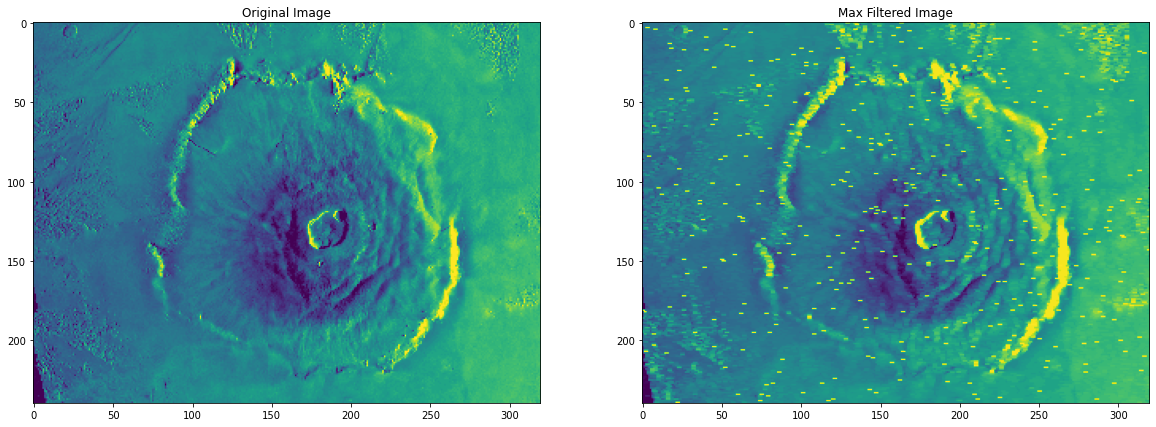

In [193]:
def max_filter(noisy_image, mat_file=None, data=False):
    filtered_image = np.ndarray.copy(noisy_image)
    for row in range(noisy_image.shape[0]):
        for column in range(1, noisy_image.shape[1] - 1):
            list = [noisy_image[row][column - k] for k in (-1, 0, 1)]
            filtered_image[row][column] = np.max(list)
    
    if mat_file:
        new_mat = dict.copy(mat_file)
        new_mat["original"] = filtered_image
        sio.savemat("filtered-mat/max.mat", new_mat)

    #image.imsave("filtered-images/max.jpg", filtered_image)
    
    if data:
        return filtered_image
    
    # figsize() function to adjust the size
    plt.subplots(figsize=(20, 8))

    # using subplot function and creating plot one
    plt.subplot(1, 2, 1)
    plt.imshow(mat['original'])
    plt.title('Original Image')

    # using subplot function and creating plot two
    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image)
    plt.title('Max Filtered Image')
    
    plt.savefig('filtered-images/max.jpg')
    # show plot
    plt.show()
    
    
    
max_filter(noisy_image, mat_file= mat)

In [ ]:
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value


def unit_step_gen(left, right):
    u = np.zeros(right - left + 1)
    for i in range(right):
        u[i - left] = 1.

    return u

## Impulse and Step Response

#### median filter
$$
y(n) = median\{ x(n-k) \}, k \in Z, \vert k \vert \leq 1
$$

- Impulse response

$$ x[n] = \delta[n] \rightarrow y(n) = median\{ \delta(n-k) \}, k \in Z, \vert k \vert \leq 1 $$

\begin{equation}
		Impulse Response = h[n]= 0
\end{equation}

- Step response

$$ x[n] = u[n] \rightarrow y(n) = median\{ u(n-k) \}, k \in Z, \vert k \vert \leq 1 $$
\begin{equation}
		Step Response = s[n]= u[n]
\end{equation}

---

#### mean filter

\begin{equation}
  y(n) = \frac{1}{M_1 + M_2 + 1} \sum_{k=-M_1}^{M_2} x(n-k) \\
\end{equation}

- Impulse response

$$ x[n] = \delta[n] \rightarrow y(n) = \frac{1}{M_1 + M_2 + 1} \sum_{k=-M_1}^{M_2} \delta(n-k) $$

\begin{equation}
		Impulse Response = h[n]=
		\begin{cases}
			\frac{1}{M_{1} + M_{2} + 1 } & -M_{1} \leq n \leq M_{2}   \\
			0 & otherwise
		\end{cases}
\end{equation}

- Step response

$$ x[n] = u[n] \rightarrow y(n) = \frac{1}{M_1 + M_2 + 1} \sum_{k=-M_1}^{M_2} u(n-k) $$
\begin{equation}
		Step Response = s[n]=
		\begin{cases}
			\frac{1+ M_{1} + n }{M_{1} + M_{2} + 1 } & -M_{1} \leq n \leq M_{2}   \\
			0 & n \lt M_{1} \\
            1 & n \gt M_{2}
		\end{cases}
\end{equation}

if $ M_{1} = 0 \Rightarrow $ mean filter is a causal system.

---

#### max filter
$$
y(n) = max\{ x(n-k) \}, k \in Z, \vert k \vert \leq 1
$$

- Impulse response

$$ x[n] = \delta[n] \rightarrow y(n) = max\{ \delta(n-k) \}, k \in Z, \vert k \vert \leq 1 $$

\begin{equation}
		Impulse Response = h[n]= \delta[n+1] + \delta[n] + \delta[n-1]
        \begin{cases}
			1 & n = -1, 0, 1   \\
			0 & otherwise
		\end{cases}
\end{equation}

- Step response

$$ x[n] = u[n] \rightarrow y(n) = median\{ u(n-k) \}, k \in Z, \vert k \vert \leq 1 $$
\begin{equation}
		Step Response = s[n]= u[n+1] = 
        \begin{cases}
			1 & n \geq -1   \\
			0 & otherwise
		\end{cases}
\end{equation}

---

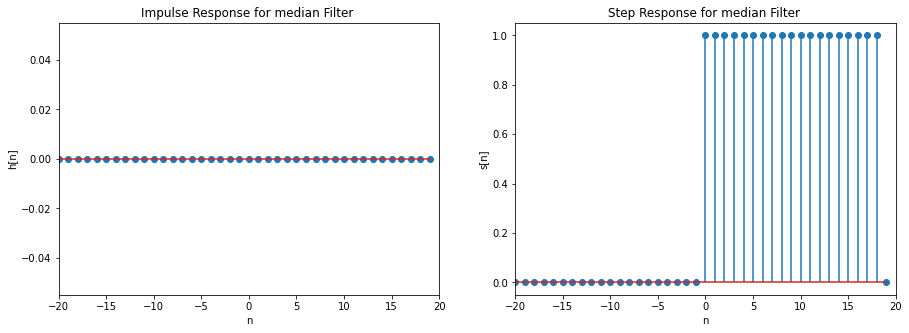

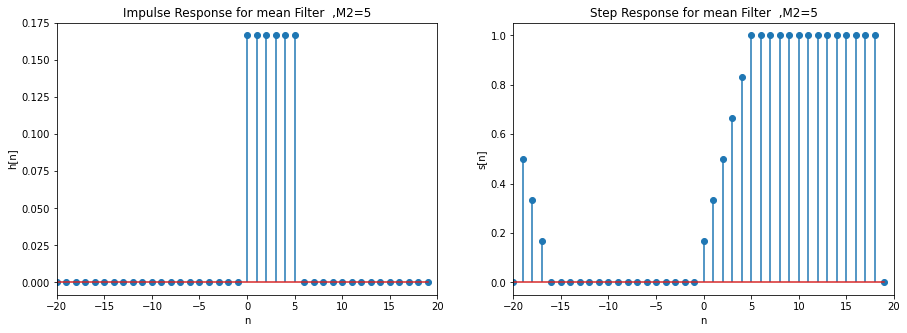

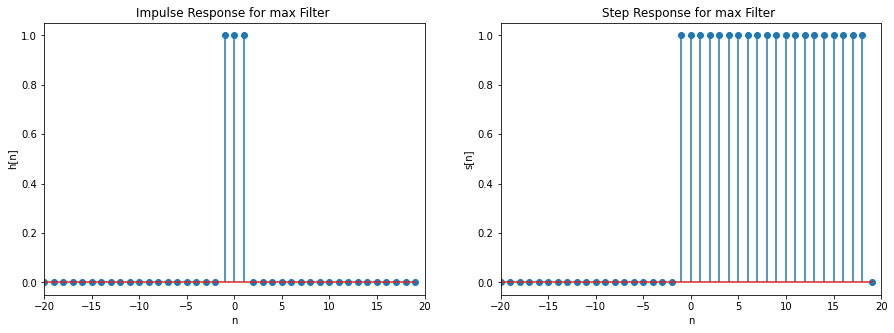

In [187]:
def impulse_and_step_response(_filter):
    
    # Impulse Response
    impulse = signal.unit_impulse(40, 20)
    zeros_horiz = np.zeros(impulse.shape[0])
    time = np.arange(-20, 20, 1)
    _impuslse = np.vstack((zeros_horiz, impulse))
    
    M2 = inf
    if _filter == 'median':
        impulse_response = median_filter(_impuslse, data=True)[1]
    elif _filter == 'mean':
        M2 = 5
        impulse_response = mean_filter(_impuslse, M2=M2, data=True)[1]
    elif _filter == 'max':
        impulse_response = max_filter(_impuslse, data=True)[1]
    
    str = "" if M2 == inf else f" ,M2={M2}"
    
    # figsize() function to adjust the size
    plt.subplots(figsize=(15, 5))

    # using subplot function and creating plot one
    plt.subplot(1, 2, 1)
    plt.xlim(left=-20, right=20)
    plt.stem(time, impulse_response)
    plt.title(f'Impulse Response for {_filter} Filter {str}')
    plt.xlabel('n')
    plt.ylabel('h[n]')

    
    #===============================================================
    
    # Step Response
    unit_step = unit_step_gen(-20, 19)
    zeros_horiz = np.zeros(unit_step.shape[0])
    time = np.arange(-20, 20, 1)
    _us = np.vstack((zeros_horiz, unit_step))
    
    M2 = inf
    if _filter == 'median':
        unit_step_response = median_filter(_us, data=True)[1]
    elif _filter == 'mean':
        M2 = 5
        unit_step_response = mean_filter(_us, M2=M2, data=True)[1]
    elif _filter == 'max':
        unit_step_response = max_filter(_us, data=True)[1]
  
    str = "" if M2 == inf else f" ,M2={M2}"
    
    # using subplot function and creating plot one
    plt.subplot(1, 2, 2)
    plt.xlim(left=-20, right=20)
    plt.stem(time, unit_step_response)
    
    plt.title(f"Step Response for {_filter} Filter {str}")
    plt.xlabel('n')
    plt.ylabel('s[n]')
    
    # show plot
    plt.show()
    
    
    
filters = ['median', 'mean', 'max']

for i in filters:
    impulse_and_step_response(i)